**Sakarya Üniversitesi**

**Bilgisayar Mühendisliği Bölümü**

**B171210033 - Mertcan Gökmen**

# **Veri Seti ve Problem Tanımı**

Metin sınıflandırması; spam tespiti, duygu analizi, yorum sınıflandırması gibi çeşitli alanlarda kullanılan bir sınıflandırmadır. Bu sınıflandırma, içerisinde ileti barındıran bütün uygulamalarda kullanılıp, kullanıcılara daha iyi bir internet deneyimi sunulmasını sağlar. 

Kaggle üzerinde bulunan "Coronavirus Tweets NLP - Text Classification" veri setinden yararlanarak yaptığım bu projede amacım, Korona Virüs döneminde insanların attıkları tweetlerle, onların yorumlarındaki olumluluğu sınıflandırmaktır.

Kullandığım veri seti: https://www.kaggle.com/datatattle/covid-19-nlp-text-classification

Veri setinde yalnızca Corona_NLP_train.csv içerisindeki verileri kullandım.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Veri CSV dosyasından okunuyor. Veri setinde bulunan özel karakterleri de okuması adına, özellikle encoding türünü verdim.
data = pd.read_csv('Corona_NLP_train.csv', encoding = "ISO-8859-1")
#İlk beş satırdaki verileri göster.
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
#Toplam kaç satır veri var?
data.shape[0]

41157

In [ ]:
#Null olmayan kaç veri var ve tipleri neler?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
#Boş olan alanların tespiti.
data.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

Makine öğrenmesi sırasında gönderiyi paylaşan kullanıcının adı, sayfa adı, mekan adı ve paylaşma tarihi bilgilerinin bir önemi olmadığı için bu sütunları çıkarıyorum.

In [ ]:
columns = ["UserName", "ScreenName", "Location", "TweetAt"] #sütunları belirt
data.drop(columns, axis = 1, inplace = True) #belirtilen sütunları çıkart
data

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [ ]:
#Hangi tip yorumdan kaç adet var?
data["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [ ]:
#Sınıflandırmayı basitleştirmek için sınıf sayısını üçe düşürüyorum.
data = data.replace({'Sentiment': {"Positive": 1, "Extremely Positive": 1, "Neutral": 0, "Negative": -1, "Extremely Negative": -1}})
data["Sentiment"].value_counts() #Kaç adet sınıf var?

 1    18046
-1    15398
 0     7713
Name: Sentiment, dtype: int64

In [ ]:
#Son beş veriyi gösterir.
data.tail()

,OriginalTweet,Sentiment
41152,Airline pilots offering to stock supermarket s...,0
41153,Response to complaint not provided citing COVI...,-1
41154,You know itÂs getting tough when @KameronWild...,1
41155,Is it wrong that the smell of hand sanitizer i...,0
41156,@TartiiCat Well new/used Rift S are going for ...,-1


In [ ]:
#Etiketler ayrı bir DataFrame'de tutulacak.
y = data["Sentiment"] #y DataFrame'ine veriyi at.
data.drop(["Sentiment"], axis = 1, inplace = True) #Asıl veriden y'yi çıkart. 
y

0        0
1        1
2        1
3        1
4       -1
        ..
41152    0
41153   -1
41154    1
41155    0
41156   -1
Name: Sentiment, Length: 41157, dtype: int64

In [ ]:
#Yorum ve durumu
for i in range(5):
  random_sayi = np.random.randint(0, data.shape[0]) #rastgele yorum seç
  print(data["OriginalTweet"][random_sayi] + " : " + str(y[random_sayi])) #yazdır

"Consumer Sentiment Collapses Amid Massive Job Loss"  https://t.co/MC6OlgcX4w  The unprecedented economic impact of the COVID-19 outbreak is crushing the labor market and consumer sentiment. : -1
Changes are coming. Is your brand ready? #HarmonicRetail #RetailEvolution #Retail #Retailing #RetailNews #RetailChanges #Covid19 #RetailExperience #InStoreExperience #BrickAndMortar https://t.co/YMuX3KoEs4 : 1


Small biz employs 2/3 of workers, and 98% of our trade is conducted by small biz. 95% of consumer market is outside US. https://t.co/q2YIb01jU8 : -1
Prices Will inflation make a comeback after the crisis ends By Miles amp Scott on org Answer it is possible but far from clear : 1
If this description of what it's like to die from Coronavirus doesn't make you #StayHome nothing will. https://t.co/KbhI2y9JhT : -1


# **Veri Ön İşlemesi**

Kullanılacak veri setinin SVM modeline verilmeden önce birtakım ön işlemlerden geçmesi gerekmektedir. Örneğin gereksiz kelimelerin (site adları, rastgele rakamlar) kaldırılması, çoğul kelimelerin tekilleştirilmesi, anlamsız kelimelerin çıkarılması (will, was, the gibi) ve string tipindeki tweetlerin sayısallaştırılması gerekmektedir.

In [ ]:
#Gerekli doğal dil işleme paketlerini ekliyoruz.
from nltk.stem import WordNetLemmatizer
import nltk
#nltk içerisindeki gerekli paketleri indirir.
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
import re



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
yeni_data = [] #sadeleştirilmiş kelimeleri içerecek dizi
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words("english") #ingilizce olan anlamsız kelimeleri çıkarır

for text in data["OriginalTweet"]:
  #Linkleri çıkarır.
  text = re.sub(r'http\S+', '', text)
  #Özel harfleri çıkarır.
  text = re.sub("[^a-zA-Z0-9]"," ",text)

  # Tokenize ve lemmatize eder.
  #Lemmatize etmek, kelimeyi kök haline döndürür. 
  #Örneğin "caring" kelimesini "care" haline dönüştürür.
  text = nltk.word_tokenize(text.lower())
  text = [lemmatizer.lemmatize(word) for word in text]

  #Anlamsız kelimeler çıkarılır.
  text = [kelime for kelime in text if kelime not in stop_words]

  #Birleştirme
  text = " ".join(text)

  yeni_data.append(text)

In [ ]:
#Temizlenmiş verileri yazdır.
for i in range(5):
  random_sayi = np.random.randint(0, data.shape[0])
  print(yeni_data[random_sayi] + " : " + str(y[random_sayi]))


asian stock rose second day row knight frank predicts house price might fall much expected read briefing update sign email : 0
panic buying demerit merit face mask sanitizers medical personal food supply world ha seen panic buying surge many coun covid19 pakistan coronavirusinpakistan coronavirus quarantinelife lockdown21 : -1
stop panic buying normal shop e g self isolation get friend neighbour family member help causing unnecessary serious problem time need focus coronavirus whether buy food etc : -1
safest job america uninsured supermarket grocerystore bagger healthy know msnbc foxnews nytimes cnn wsj cnbc politico huffpost drudge bbc gop npr dailykos thehill wapo nbc cbs ap slate aarp fed covid 19 realdonaldtrump nyc : 1
rv blandin tsxman figure 3 letter break natgas demand u covid 19 crisis residential demand increase account 21 total natural gas demand demand decreasing nyse gas p : -1


Kelimelerin sayısallaştırılıp işlenebilir hale getirilmiş hali, Bag of Words olarak bilinir.

Örnek bir Bag of Words şu şekildedir:

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/BoWBag-of-Words-model-2.png">

In [ ]:
#Bag of Words haline getirmek için gerekli import yapılır
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#On bin kelimelik bir Bag of Words olacak.
vectorizer = CountVectorizer(max_features=10000)
bag_of_words = vectorizer.fit_transform(yeni_data)

In [ ]:
#Veri seti eğitim ve test için bölünür.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(bag_of_words, np.asarray(y), test_size=0.25)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30867, 10000)
(10290, 10000)
(30867,)
(10290,)


# **Support Vector Machine İle Sınıflandırma**

In [ ]:
from sklearn.svm import SVC
#Model oluşturulur.
model = SVC()
#Model eğitimi yapılır. Bu işlem biraz uzun sürebilir.
model.fit(x_train, y_train)

SVC()

In [ ]:
#Tahminler yapılır.
predictions = model.predict(x_test)

In [ ]:
#Değerlendirme için Confusion Matriks'ini bul.
from sklearn.metrics import accuracy_score,confusion_matrix
print(f"Modelin accuracy değeri: {accuracy_score(y_test, predictions)}")
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix

Modelin accuracy değeri: 0.7687074829931972


array([[2888,  282,  636],
       [ 315, 1261,  363],
       [ 494,  290, 3761]])

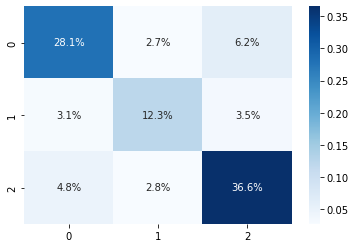

In [ ]:
#Daha iyi bir görselleştirme için seaborn kütüphanesini kullandım.
import seaborn as sns
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, 
            fmt='.1%', cmap='Blues')

In [ ]:
#Kendi oluşturduğum rastgele bir cümleyi test edeceğim.
#Bundan dolayı tekrardan ön işlemlerden geçmesi gerekli.
text = "It has a really bad effect on children's education."
text = re.sub(r'http\S+', '', text)
#Özel harfleri çıkarır.
text = re.sub("[^a-zA-Z0-9]"," ",text)
# Tokenize ve lemmatize eder.
text = nltk.word_tokenize(text.lower())
text = [lemmatizer.lemmatize(word) for word in text]

#Anlamsız kelimeler çıkarılır.
text = [kelime for kelime in text if kelime not in stop_words]

#Birleştirme
text = " ".join(text)
text

'ha really bad effect child education'

In [ ]:
#Textimi 10000 kelime dağarcığına sahip bag of words'e çevirdim.
text_final = vectorizer.transform([text])
text_final.shape

(1, 10000)

In [ ]:
#Cümlem negatif olarak tahmin edildi.
prediction = model.predict(text_final)
prediction[0]

-1

# **Random Forest İle Sınıflandırma**
Birden fazla karar ağacı barındıran, rastgele olarak seçilmiş ağaçların çıktılarını birleştirip en iyi sonucu üretmeye çalışan algoritmadır. Parametre olarak ağaç sayısını almaktadır. En iyi ağaç sayısını üretmek için Elbow Tekniği'ne benzer bir yaklaşımla sonuç elde edilir.

<img src="https://miro.medium.com/max/690/1*eucTQhlYKFSFw1r4iSkS_g.png">

Random Forest'ın gücü, birbiriyle düşük ilişkili ağaçların, aynı sonucu üretmesinden kaynaklanır. Bunu sağlayan nedense, ağaçların kendilerine özgü hataları diğer ağaçların önlemesidir. Bir ağacın yanlış tahmini, birden çok doğru tahmin veren ağacı etkileyemeyecektir.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png">

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 200, random_state = 42)

In [ ]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
#Birden fazla ağaç sayısı denenerek en iyi sonuç aranacak.
agac_sayilari = [100, 250, 500, 750]
scores = []
for estimator in agac_sayilari:
  rf_model = RandomForestClassifier(n_estimators = estimator, random_state = 42)
  rf_model.fit(x_train, y_train)
  #Score, ortalama accuracy değerini döndürür.
  score = rf_model.score(x_test, y_test)
  scores.append(score)

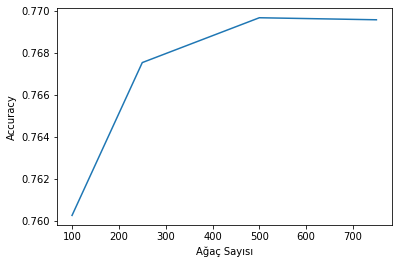

In [ ]:
#Elbow Tekniği ile Ağaç Sayısı ve Skor karşılaştırma
plt.plot(agac_sayilari, scores)
plt.xlabel('Ağaç Sayısı')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Verilen estimator değerlerine bakıldığında, çok az bir fark görülmektedir.
for i in range(len(agac_sayilari)):
  print(f"{agac_sayilari[i]} Estimator - {scores[i]} Score")

100 Estimator - 0.7602526724975704 Score
250 Estimator - 0.7675413022351798 Score
500 Estimator - 0.7696793002915452 Score
750 Estimator - 0.7695821185617104 Score


In [ ]:
predictions = rf_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix

array([[2772,  312,  722],
       [ 228, 1417,  294],
       [ 504,  311, 3730]])

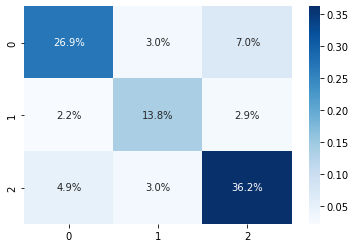

In [ ]:
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, 
            fmt='.1%', cmap='Blues')

In [ ]:
print(text)
text_final

ha really bad effect child education


<1x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
prediction = model.predict(text_final)
prediction[0]

-1